<a href="https://colab.research.google.com/github/cs-hasibul/Blind-source-separation-using-FastICA/blob/main/Blind_source_separation_using_FastICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
from sklearn.decomposition import FastICA

In [ ]:
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 10, n_samples)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data

In [ ]:
# Mix data
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [ ]:
ica = FastICA()
S_ = ica.fit(X).transform(X)  # Get the estimated sources
A_ = ica.mixing_ # Get estimated mixing matrix
# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

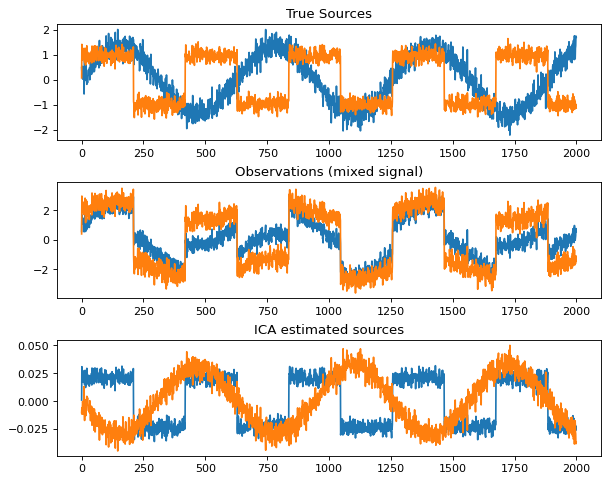

In [ ]:
# Plot results
pl.figure(figsize=(8, 6), dpi=80)
pl.subplot(3, 1, 1)
pl.plot(S)
pl.title('True Sources')
pl.subplot(3, 1, 2)
pl.plot(X)
pl.title('Observations (mixed signal)')
pl.subplot(3, 1, 3)
pl.plot(S_)
pl.title('ICA estimated sources')
pl.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
pl.show()